EDA on COCO (for SIFT)

In [1]:
from pycocotools.coco import COCO
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train2017 = 'train2017'
val2017 = 'val2017'
ann_file = 'dataset/coco/annotations/instances_{}.json'

In [3]:
def get_coco_images_and_labels(coco):

    # get all filenames
    img_ids_w_filename = {coco.dataset['images'][i]['id']: coco.dataset['images'][i]['file_name'] for i in range(len(coco.dataset['images']))}      # use dictionary for faster query

    # get all images
    img_ids = [coco.dataset['images'][i]['id'] for i in range(len(coco.dataset['images']))]

    # load labels for each imgs (as one img may have multiple labels)
    labels_per_imgs = []
    for i in range(len(img_ids)):
        labels_per_imgs.append(coco.loadAnns(coco.getAnnIds(imgIds=img_ids[i])))

    img_id_w_bb = []
    label_per_obj = []

    for labels in labels_per_imgs:
        for l in labels:
            img_id_w_bb.append((l['id'], l['image_id'], l['bbox']))
            label_per_obj.append(l['category_id'])

    return img_ids_w_filename, img_id_w_bb, label_per_obj

In [4]:
coco_train = COCO(ann_file.format(train2017))
coco_val = COCO(ann_file.format(val2017))

img_ids_w_filename_train, img_id_w_bb_train, label_per_obj_train = get_coco_images_and_labels(coco_train)
img_ids_w_filename_val, img_id_w_bb_val, label_per_obj_val = get_coco_images_and_labels(coco_val)

loading annotations into memory...
Done (t=9.08s)
creating index...
index created!
loading annotations into memory...
Done (t=0.24s)
creating index...
index created!


In [7]:
# all categories (with ids)
cats = coco_train.loadCats(coco_train.getCatIds())

In [8]:
cats

[{'supercategory': 'person', 'id': 1, 'name': 'person'},
 {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'},
 {'supercategory': 'vehicle', 'id': 3, 'name': 'car'},
 {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'},
 {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'},
 {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'},
 {'supercategory': 'vehicle', 'id': 7, 'name': 'train'},
 {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'},
 {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'},
 {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'},
 {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'},
 {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'},
 {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'},
 {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'},
 {'supercategory': 'animal', 'id': 16, 'name': 'bird'},
 {'supercategory': 'animal', 'id': 17, 'name': 'cat'},
 {'supercategory': 'animal', 'id': 18, 'name': 'dog'},

Label distribution

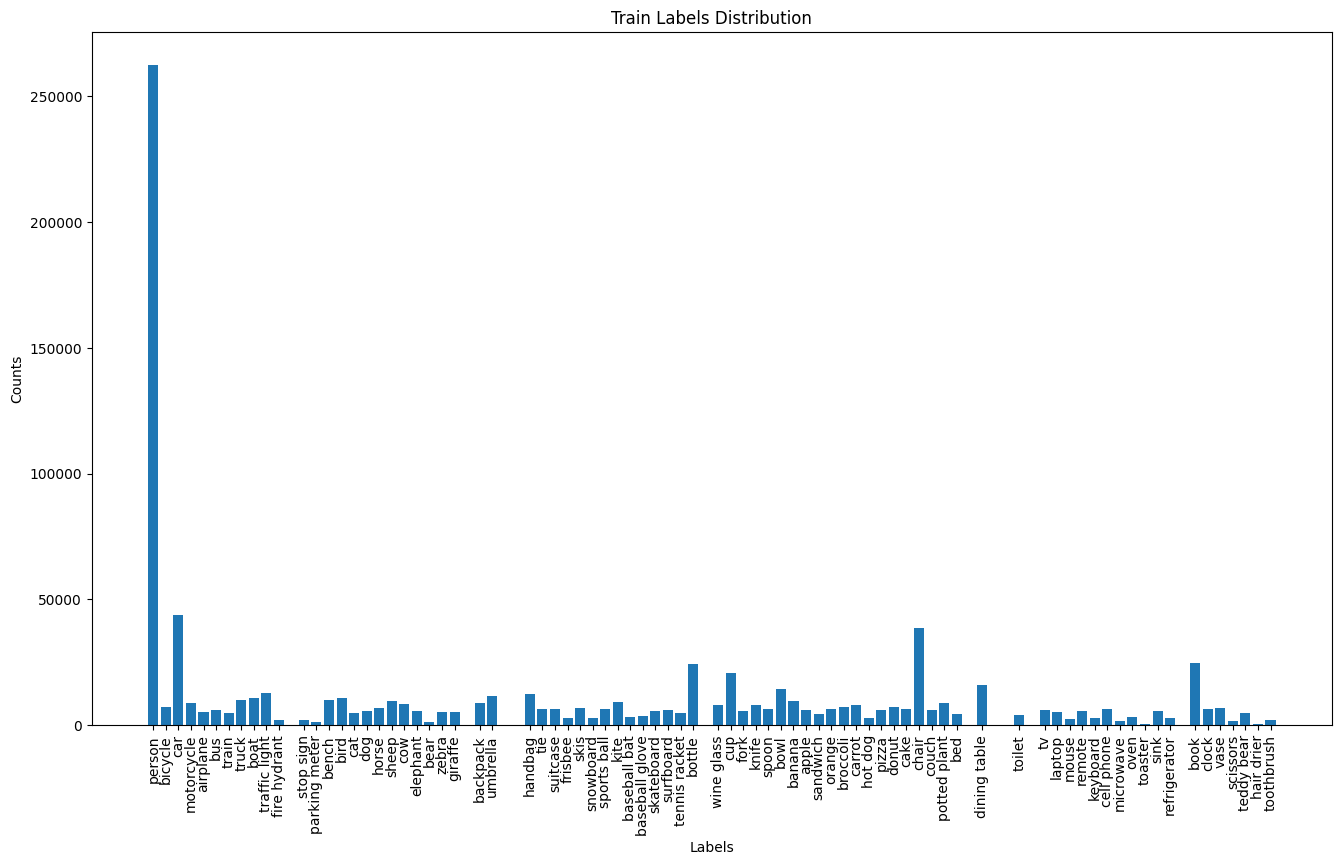

In [5]:
# plot a graph to see the distribution of labels
# with xticks as the category names

# all categories (with ids)
cats = coco_train.loadCats(coco_train.getCatIds())

def plot_distribution(labels, title):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(16,9))
    plt.bar(unique, counts)
    plt.title(title)
    plt.xlabel('Labels')
    plt.ylabel('Counts')
    plt.xticks(unique, [c['name'] for c in cats], rotation=90)
    plt.show()
plot_distribution(label_per_obj_train, 'Train Labels Distribution')

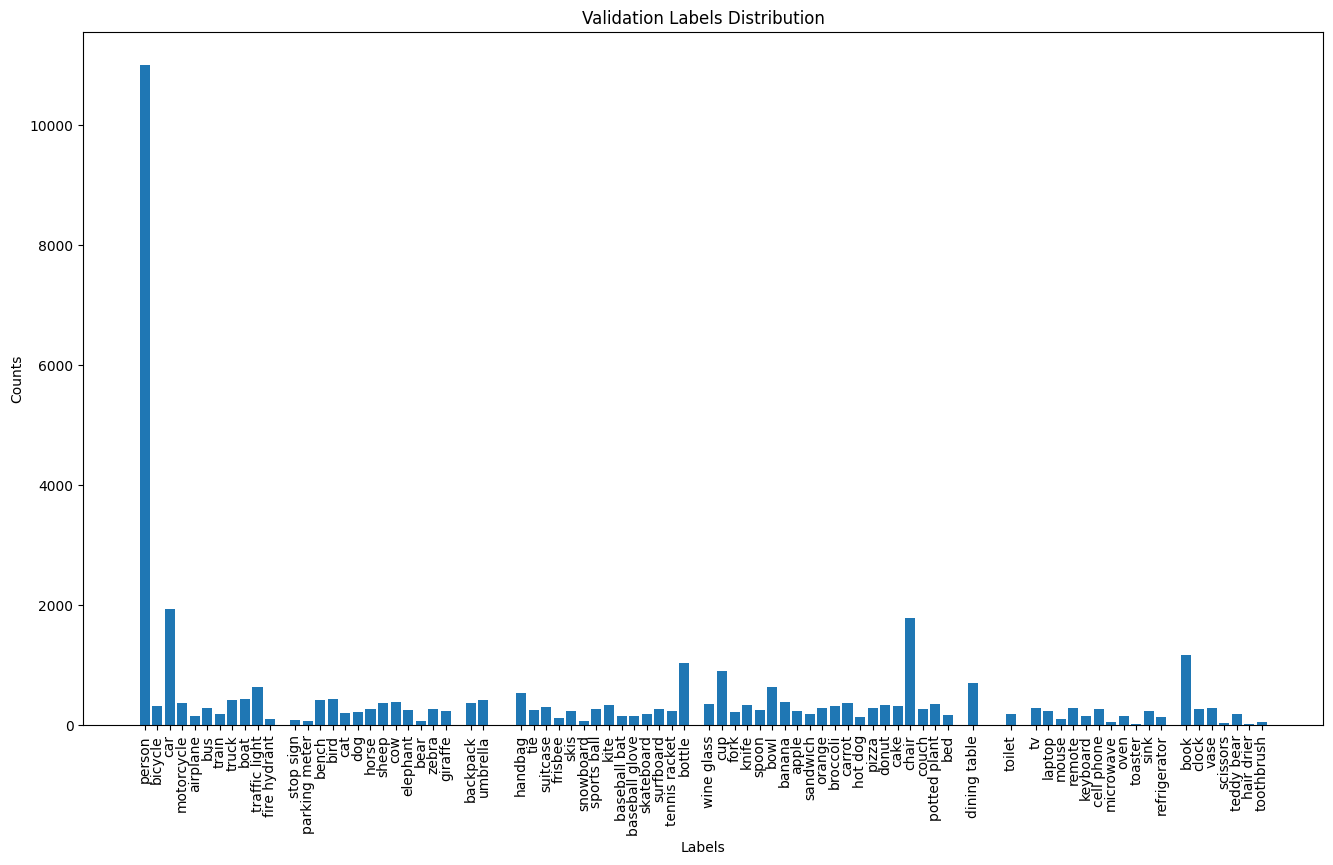

In [6]:
plot_distribution(label_per_obj_val, 'Validation Labels Distribution')

Top N labels, and their distribution

In [14]:
# create a dataframe to store the counts of the labels, and the corresponding names

import pandas as pd

df_train = pd.DataFrame(columns=['category_id', 'category_name', 'count'])
df_train['category_id'] = [cat['id'] for cat in cats]
df_train['category_name'] = [cat['name'] for cat in cats]
df_train['count'] = 0

unique, counts = np.unique(label_per_obj_train, return_counts=True)
for i in range(len(unique)):
    df_train.loc[df_train['category_id'] == unique[i], 'count'] = counts[i]

df_train = df_train.sort_values(by='count', ascending=False)
df_train = df_train.reset_index(drop=True)


In [21]:
df_train.iloc[:30]

,category_id,category_name,count
0,1,person,262465
1,3,car,43867
2,62,chair,38491
3,84,book,24715
4,44,bottle,24342
5,47,cup,20650
6,67,dining table,15714
7,51,bowl,14358
8,10,traffic light,12884
9,31,handbag,12354


In [33]:
N_LABELS = 10

sum(df_train.iloc[:N_LABELS]['count']), sum(df_train['count']), sum(df_train.iloc[:N_LABELS]['count'])/sum(df_train['count'])*100

(469840, 860001, 54.632494613378356)

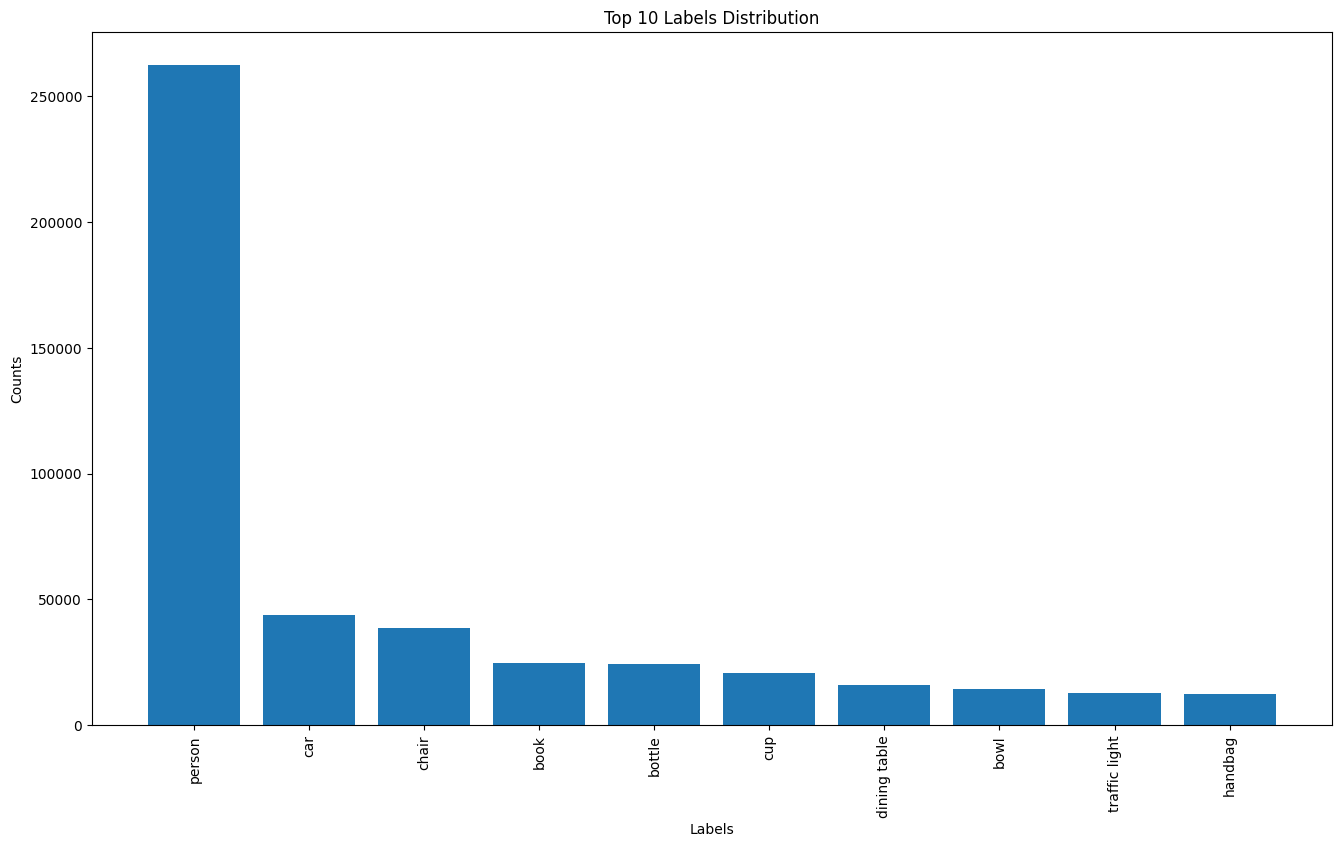

In [ ]:
# plot a graph to see the distribution of top N labels

def plot_top_n_labels(df, n):
    plt.figure(figsize=(16,9))
    plt.bar(df.iloc[:n]['category_name'], df.iloc[:n]['count'])
    plt.title('Top {} Labels Distribution'.format(n))
    plt.xlabel('Labels')
    plt.ylabel('Counts')
    plt.xticks(rotation=90)
    plt.show()

plot_top_n_labels(df_train, N_LABELS)

In [35]:
# do the same for validation set

df_val = pd.DataFrame(columns=['category_id', 'category_name', 'count'])
df_val['category_id'] = [cat['id'] for cat in cats]
df_val['category_name'] = [cat['name'] for cat in cats]
df_val['count'] = 0
unique, counts = np.unique(label_per_obj_val, return_counts=True)
for i in range(len(unique)):
    df_val.loc[df_val['category_id'] == unique[i], 'count'] = counts[i]

df_val = df_val.sort_values(by='count', ascending=False)
df_val = df_val.reset_index(drop=True)

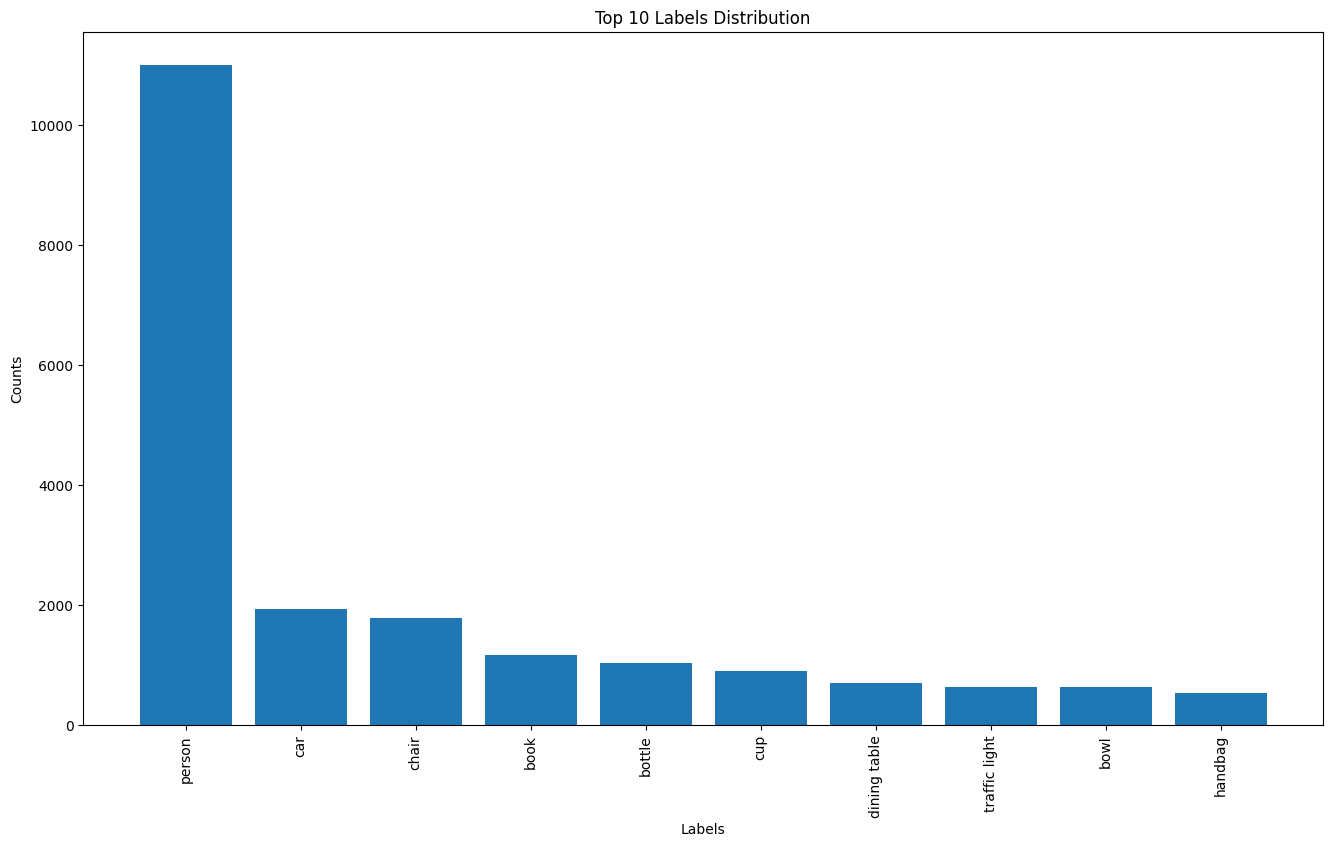

In [36]:
plot_top_n_labels(df_val, N_LABELS)

In [37]:
# check if the top N labels are the same in train and validation set

set(df_train.iloc[:N_LABELS]['category_name'].values) ^ set(df_val.iloc[:N_LABELS]['category_name'].values)

set()

In [38]:
# show top N categories ID

df_train.iloc[:N_LABELS]['category_id'].values, df_val.iloc[:N_LABELS]['category_id'].values

(array([ 1,  3, 62, 84, 44, 47, 67, 51, 10, 31]),
 array([ 1,  3, 62, 84, 44, 47, 67, 10, 51, 31]))

Since its an empty set, it means they share the same set of top N labels

Bounding box size distribution; all labels

In [ ]:
# calculate the area of the bounding box for each 